In [56]:
print('This is hyper parameterised model')

This is hyper parameterised model


In [57]:
## importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [58]:
df = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [59]:
df = df.dropna()



In [60]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [61]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [62]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [63]:
## Encoding
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [64]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [65]:
## Independent and Dependent features
X=df.drop('FWI',axis=1)
y=df['FWI']

In [66]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [67]:
## Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [68]:
X_train.shape, X_test.shape

((181, 11), (61, 11))

In [69]:
## Feature collection based on correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.642317,-0.286252,-0.344746,0.703751,0.495240,0.380548,0.626982,0.468448,0.539860,0.256895
RH,-0.642317,1.000000,0.235273,0.235885,-0.634587,-0.415743,-0.250172,-0.693824,-0.366432,-0.443387,-0.374167
Ws,-0.286252,0.235273,1.000000,0.177213,-0.123396,-0.008636,0.094245,0.025235,0.029687,-0.039283,-0.266528
Rain,-0.344746,0.235885,0.177213,1.000000,-0.550650,-0.284970,-0.294811,-0.342525,-0.295193,-0.374895,-0.068452
FFMC,0.703751,-0.634587,-0.123396,-0.550650,1.000000,0.618340,0.536413,0.745852,0.608520,0.768691,0.212436
DMC,0.495240,-0.415743,-0.008636,-0.284970,0.618340,1.000000,0.876217,0.694289,0.983363,0.624331,0.189571
DC,0.380548,-0.250172,0.094245,-0.294811,0.536413,0.876217,1.000000,0.556216,0.947340,0.560526,-0.088017
ISI,0.626982,-0.693824,0.025235,-0.342525,0.745852,0.694289,0.556216,1.000000,0.662479,0.756892,0.254400
BUI,0.468448,-0.366432,0.029687,-0.295193,0.608520,0.983363,0.947340,0.662479,1.000000,0.622317,0.088578
Classes,0.539860,-0.443387,-0.039283,-0.374895,0.768691,0.624331,0.560526,0.756892,0.622317,1.000000,0.160857


<Axes: >

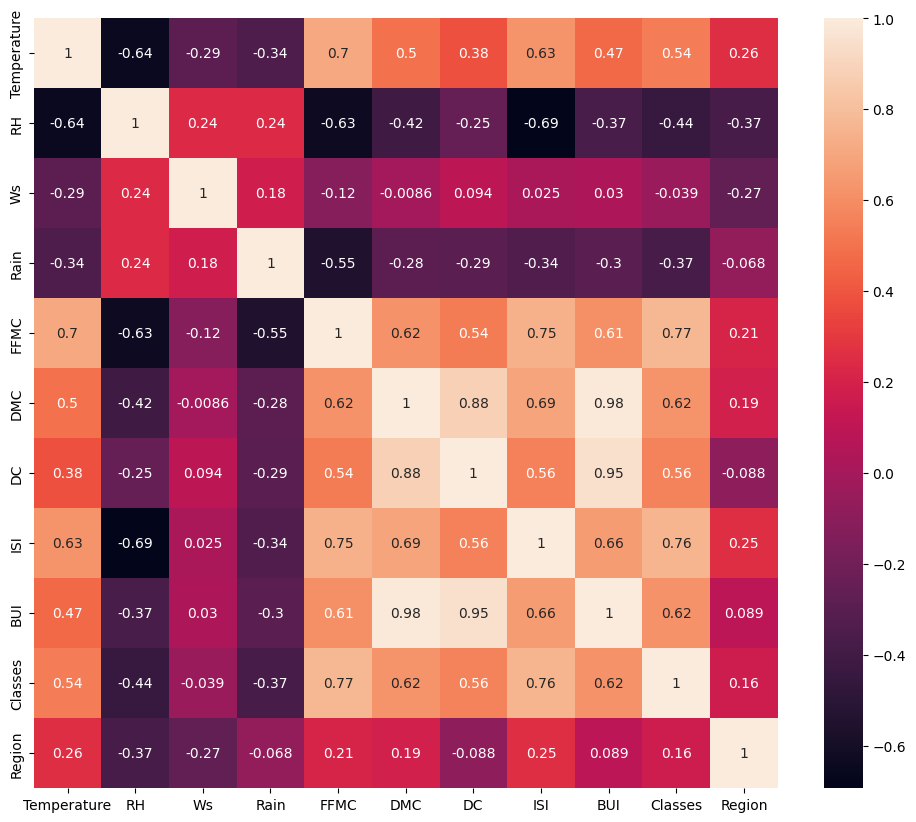

In [70]:
## Checking for multicollinearity
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr,annot=True)

In [71]:
def correlation(dataset,threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                col_name = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(col_name)
    return col_corr

In [72]:
## Threshold = -- Domain Expertise
corr_features = correlation(X_train,0.85)

In [73]:
## Drop features when correlation is above 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape, X_test.shape


((181, 9), (61, 9))

In [74]:
## Feature scaling  and standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Text(0.5, 1.0, 'X_train after scaling')

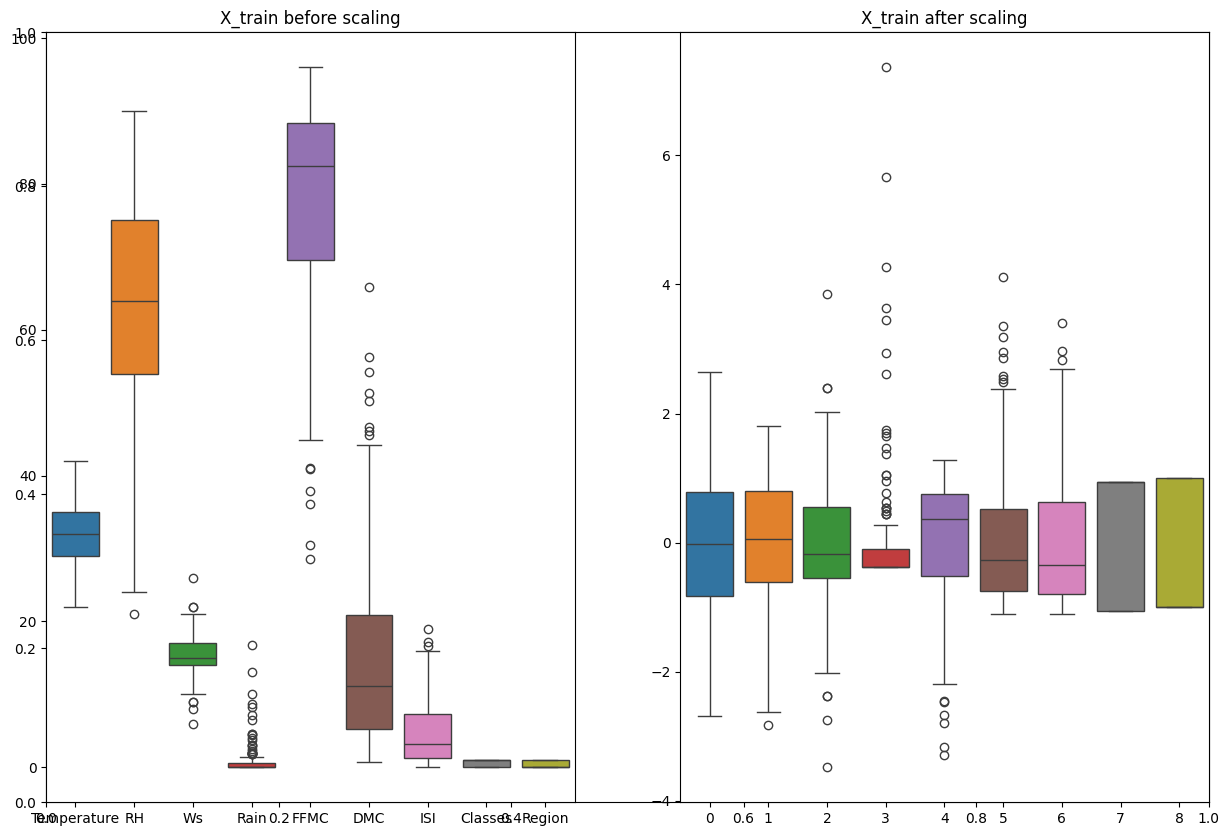

In [75]:
## boxplots to understand effects of standard scaler
plt.subplots(figsize=(15,10))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train after scaling')

Applying Machine Learning Algorithm 

Linear Regression Model

Mean absolute error :  33.61021640076071
R2 score :  -41.29994545311684


c:\Users\manna\.conda\envs\myenv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


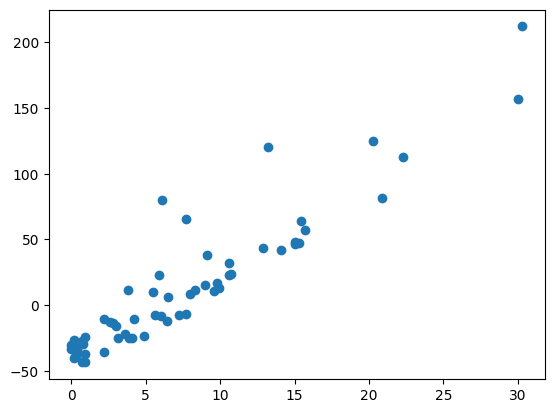

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg = LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred = linreg.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error : ",mae)
print("R2 score : ",score)
plt.scatter(y_test,y_pred)

Mean absolute error :  1.1391410961872968
R2 score :  0.9513438050245122


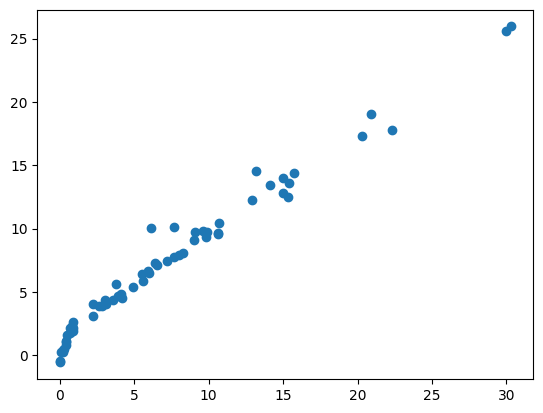

In [81]:
## Lasso regression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
Lasso = Lasso()
Lasso.fit(X_train_scaled,y_train)
y_pred = Lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error : ",mae)
print("R2 score : ",score)
plt.scatter(y_test,y_pred)

Mean absolute error :  0.6423021040965083
R2 score :  0.980670163548798


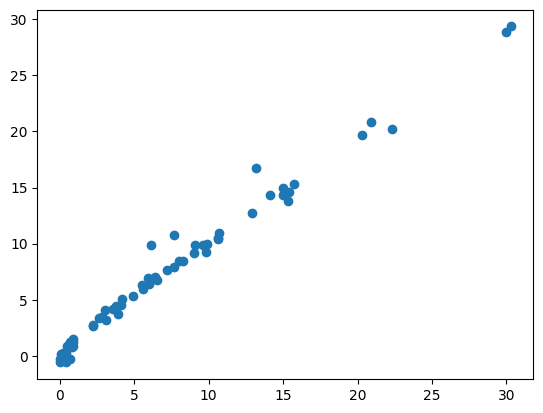

In [82]:
## Ridge regression model
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
Ridge = Ridge()
Ridge.fit(X_train_scaled,y_train)
y_pred = Ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error : ",mae)
print("R2 score : ",score)
plt.scatter(y_test,y_pred)

Mean absolute error :  1.939333084932479
R2 score :  0.871883156427785


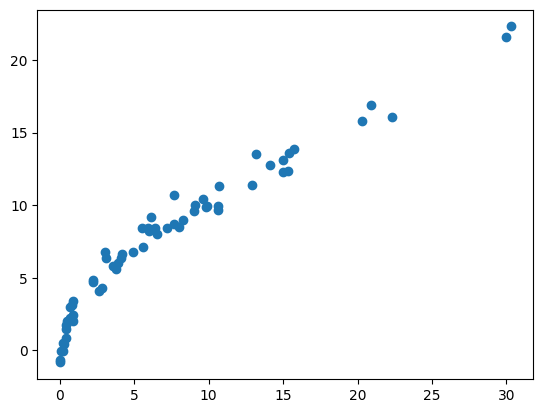

In [83]:
## elastic net
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic = ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred = elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error : ",mae)
print("R2 score : ",score)
plt.scatter(y_test,y_pred)

Cross Validation

In [84]:
from sklearn.linear_model import LassoCV
Lassocv = LassoCV()
Lassocv.fit(X_train_scaled,y_train)

LassoCV()

In [88]:
Lassocv.mse_path_

array([[55.48899774, 58.20087708, 38.28226876, 64.46280783, 67.83669816],
       [49.33294494, 51.8985679 , 33.04184831, 58.76981291, 63.26933163],
       [43.26004028, 45.91115876, 28.36558528, 53.06113432, 57.12260056],
       [37.91700906, 40.67091172, 24.38471349, 48.05303851, 51.72712254],
       [33.25783808, 36.08260604, 21.00280047, 43.65717047, 46.98837313],
       [29.19413544, 32.06353219, 18.13643438, 38.9303178 , 42.00339687],
       [25.6493759 , 28.54139071, 15.71340316, 34.01448963, 36.9248766 ],
       [22.55653592, 25.45315461, 13.67124232, 29.74373974, 32.49222363],
       [19.85741222, 22.74416187, 11.95595049, 26.03354522, 28.62212773],
       [17.50116015, 20.36647751, 10.5208021 , 22.81008168, 25.24231268],
       [15.44404969, 18.27840001,  9.32556286, 20.01073495, 22.28934515],
       [13.64747509, 16.4435617 ,  8.33538375, 17.57948235, 19.70949933],
       [12.07800022, 14.83017149,  7.52022747, 15.46814441, 17.45448566],
       [10.70651057, 13.41070703,  6.8

Mean absolute error :  0.6604215758734399
R2 score :  0.9806052674761312


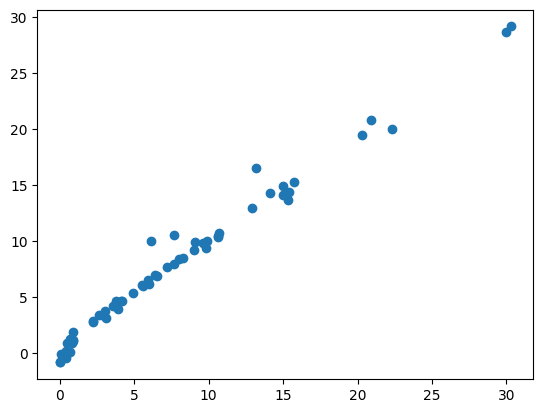

In [90]:
y_pred = Lassocv.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error : ",mae)
print("R2 score : ",score)
plt.scatter(y_test,y_pred)